In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
data = pd.read_csv('data/Country-data.csv', sep=",", encoding="ISO-8859-1", header=0)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data_null = round(100*(data.isnull().sum())/len(data), 2)
data_null

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [6]:
data.shape
#определяем форму массива

(167, 10)

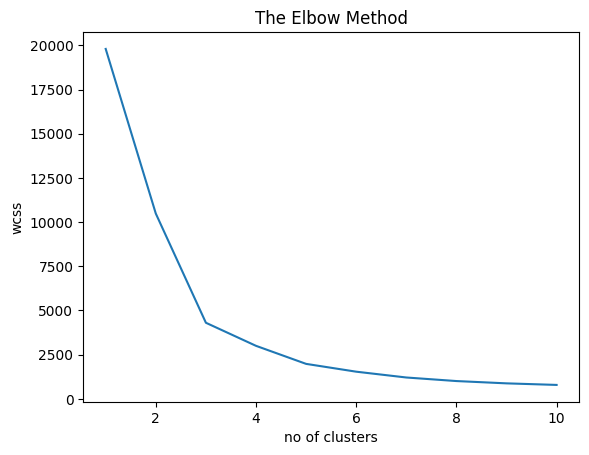

In [7]:
X= data.iloc[:, [3,6]].values


wcss=[]
#используем метод к средних
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Можем найти оптимальное значение для K, используя график точек локтя.
#Инициализируем алгоритм K-средних для диапазона значений K и наносим его на
#график относительно WCSS для каждого значения K.

#Визуализация метода ELBOW для получения оптимального значения K
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
#K-Means ++ - это алгоритм, который используется для инициализации начальных
#центроидов для алгоритма K-средних. Он выбирает начальные центры кластеров
#для кластеризации с k-средним разумным способом для ускорения
#конвергенции.

Kmean = KMeans(n_clusters=5)
Kmean.fit(X)

KMeans(n_clusters=5)

In [15]:
X.shape
#определяем форму массива


(167, 2)

In [10]:
centroids =Kmean.cluster_centers_ # поиск центроидов кластеров
centroids

array([[  5.27241379,  18.04827586],
       [  7.75906977,   1.9832093 ],
       [  5.07      , 104.        ],
       [  6.17591837,   8.50020408],
       [  5.175     ,  42.55      ]])

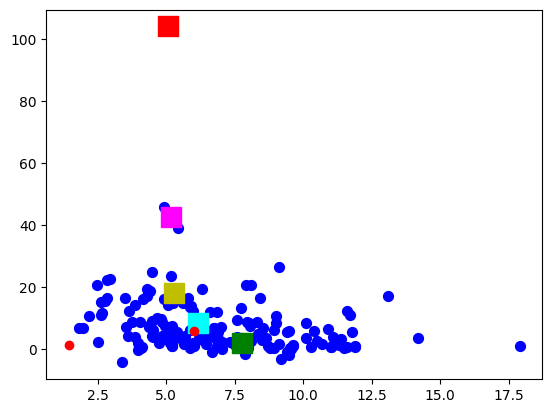

In [11]:
sample_test=np.array(X) # новая заданная точка даных

plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b') # визуализация центроидов 
plt.scatter(centroids[1,0],centroids[1,1], s=200, c='g', marker='s')
plt.scatter(centroids[0,0],centroids[0,1], s=200, c='y', marker='s')
plt.scatter(centroids[2, 0], centroids[2, 1], s = 200, c = 'r', marker='s')
plt.scatter(centroids[3, 0], centroids[3, 1], s = 200, c = 'cyan', marker='s')
plt.scatter(centroids[4, 0], centroids[4, 1], s = 200, c = 'magenta', marker='s')
plt.plot(sample_test[4], sample_test[4],'ro') # визуализация заданной точки данных
plt.show()

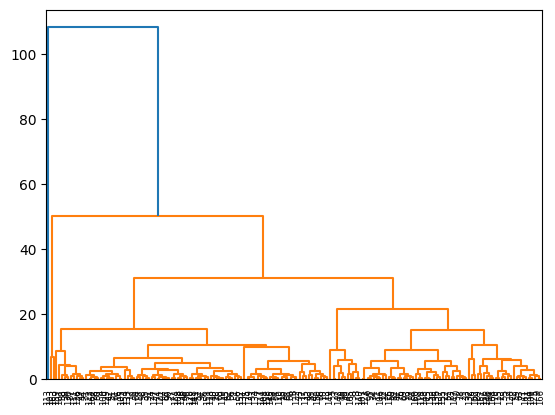

In [16]:
# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(X, method='complete')

# Строим дендрограмму
dendrogram(mergings,
            # labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

In [17]:
mergings.shape

(166, 4)

In [18]:
y2= data.iloc[:, [6]].values

silhouette_score(X, Kmean.labels_)

0.42656445688422606

In [19]:
print(mergings)

[[1.12000000e+02 1.62000000e+02 1.14017543e-01 2.00000000e+00]
 [7.50000000e+01 1.39000000e+02 1.59314155e-01 2.00000000e+00]
 [1.60000000e+01 1.05000000e+02 1.64000000e-01 2.00000000e+00]
 [1.07000000e+02 1.23000000e+02 1.70880075e-01 2.00000000e+00]
 [5.20000000e+01 9.70000000e+01 1.84390889e-01 2.00000000e+00]
 [2.50000000e+01 1.53000000e+02 2.00000000e-01 2.00000000e+00]
 [9.00000000e+00 1.66000000e+02 2.00249844e-01 2.00000000e+00]
 [5.40000000e+01 1.10000000e+02 2.02000000e-01 2.00000000e+00]
 [7.40000000e+01 1.21000000e+02 2.02484567e-01 2.00000000e+00]
 [5.30000000e+01 1.34000000e+02 2.08700743e-01 2.00000000e+00]
 [5.00000000e+00 3.70000000e+01 2.14709106e-01 2.00000000e+00]
 [8.00000000e+00 1.22000000e+02 2.30000000e-01 2.00000000e+00]
 [2.00000000e+01 8.10000000e+01 2.33238076e-01 2.00000000e+00]
 [9.40000000e+01 1.64000000e+02 2.50000000e-01 2.00000000e+00]
 [4.20000000e+01 5.10000000e+01 2.76586334e-01 2.00000000e+00]
 [6.70000000e+01 9.00000000e+01 2.94278779e-01 2.000000